Data Wrangling with Python: Activity 7, page 207 Lesson 05 Topic 02 Activity 01 In this activity you are given the Wikipedia page where we have the GDP of all countries listed and you are asked to create three data frames from the three sources mentioned in the page ( link - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) )
You will have to -
Open the page in a separate chrome/firefox tab and use something like inspect element tool to see the source HTML and understand the structure Read the page using bs4 Find the table structure you will need to deal with (how many tables are there) Find the right table using bs4 Separate the Source Names and their corresponding data Get the source names from the list of sources you have created Seperate the header and data from the data that you separated before. For the first source only. And then create a DataFrame using that Repeat the last task for the other two data sources.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
fd = open("/Users/vishnukolluri/Downloads/List of countries by GDP (nominal) - Wikipedia.html", "r")
soup = BeautifulSoup(fd)
fd.close()

In [2]:
#Find all the tables
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [3]:
#Selecting required tables of type wikitable
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [4]:

sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [5]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [6]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [7]:
len(data_tables)

3

In [8]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [9]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [10]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [11]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [12]:
df1 = pd.DataFrame(data_rows1, columns=header1)

In [13]:
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [14]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [15]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [16]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [17]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [18]:
df2 = pd.DataFrame(data_rows2, columns=header2)

In [19]:
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [25]:
#the third one
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [21]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [22]:
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [24]:
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
# Read CSV
visit = pd.read_csv('/Users/vishnukolluri/Downloads/visit_data.csv')

# Dataframe Details
visit.head()
info = visit.shape
print('Number of rows in the dataframe is : ', info[0])

Number of rows in the dataframe is :  1000


In [29]:
#  duplicates
print('Duplicate entries in email column is : ', visit.duplicated(['email']).sum())

Duplicate entries in email column is :  0


In [31]:
#  NaN
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [32]:
# Dropna from visit column
visit_1 = visit.dropna(subset=['visit'], axis=0)
info2= visit_1.shape
print('Number of rows in new dataframe is : ', info2[0])

Number of rows in new dataframe is :  974


{'whiskers': [<matplotlib.lines.Line2D at 0x7f81b9091be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81ca79d280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f81b9091790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f81ca79d9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f81ca79dd30>],
 'means': []}

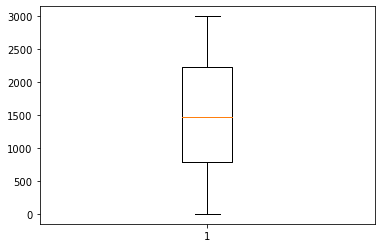

In [33]:
# Box plot
plt.boxplot(visit_1.visit)   # Box plot

In [34]:
# Remove Outliers
visit_2 = visit_1[(visit_1['visit'] <= 2900) & (visit_1['visit'] >= 100)]
info3 = visit_2.shape
print('Number of rows in new dataframe is : ', info3[0])

Number of rows in new dataframe is :  923


3 Insert data into a SQL Lite database – create a table with the following data:

In [38]:
import sqlite3

# Create a table 

ct = """
CREATE TABLE user
(Name VARCHAR(20), 
 Address VARCHAR(35), 
 City VARCHAR(10), 
 State VARCHAR(10), 
 Zip_code VARCHAR(10), 
 Phone Number VARCHAR(10)
 );"""

con = sqlite3.connect('mydata.sqlite') 
con.execute(ct)                    
con.commit()                           # Commit changes

In [49]:
# Insert 10 rows into database

data = [('Rob Parlor', '6812, Pacific St', 'Omaha', 'NE', 68106, 1234567891),
        ('Glen Jones', '7474, Pine St', 'Omaha', 'NE', 68106, 2345678912),
        ('Vijay W', '8900, Billard Av', 'Ralston', 'NE', 68127, 3456789123),
        ('Saurabh Biswas', '7510 Lakeview Ct', 'La Vista', 'NE', 68961, 4567891234),
        ('Gourav Verma', '6855, Pacific St', 'Omaha', 'NE', 68106, 5678912345),
        ('Brian Sampson', '1855, Center St', 'Omaha', 'NE', 68116, 9670912345),
        ('Terry Durham', '58, Boys Town', 'Omaha', 'NE', 69116, 6678910345),
        ('Chandu Y', '905, Pacific St', 'Omaha', 'NE', 68106, 5670002345),
        ('Shani Kumar', '1119, Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005),
        ('Dan Cross', '6855, Pacific St', 'Omaha', 'NE', 68106, 7600012345)]

inst = "INSERT INTO DB_Tbl VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(inst, data)
con.commit()

In [50]:
# Display the content of database
cursor = con.execute('select * from DB_Tbl')
rows = cursor.fetchall()
rows

[('John Doe', '100 Becker Street', 'Chicago', 'IL', 60015, 4536273492),
 ('Bond James', '101 Becker Street', 'Chicago', 'IL', 60015, 4536274322),
 ('Sachin Tendulkar', '102 Becker Street', 'Chicago', 'IL', 68116, 4536268921),
 ('Steve Jobs', '103 Becker Street', 'Chicago', 'IL', 11237, 4536268655),
 ('Vishnu Kolluri', '144th, Pacific St', 'Omaha', 'NE', 68106, 5678912345),
 ('Simran Sampson', '123, Center St', 'Omaha', 'NE', 68116, 9670912345),
 ('Terry Durham', '58, Boys Town', 'Omaha', 'NE', 69116, 6678910345),
 ('Chandu Y', '905, Pacific St', 'Omaha', 'NE', 68028, 5670002345),
 ('Venky Kumar', '1119, Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005),
 ('Keshav Cross', '6855, Pacific St', 'Omaha', 'NE', 68106, 7600012345),
 ('Rob Parlor', '6812, Pacific St', 'Omaha', 'NE', 68106, 1234567891),
 ('Glen Jones', '7474, Pine St', 'Omaha', 'NE', 68106, 2345678912),
 ('Vijay W', '8900, Billard Av', 'Ralston', 'NE', 68127, 3456789123),
 ('Saurabh Biswas', '7510 Lakeview Ct', 'La Vista', 'NE

In [48]:
# contents of database
cursor = con.execute('select * from user')
rows = cursor.fetchall()
rows

[]

In [51]:
# data from database into a pandas dataframe

DF_Tab = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
DF_Tab

,Name,Address,City,State,Zip,Phone
0,John Doe,100 Becker Street,Chicago,IL,60015,4536273492
1,Bond James,101 Becker Street,Chicago,IL,60015,4536274322
2,Sachin Tendulkar,102 Becker Street,Chicago,IL,68116,4536268921
3,Steve Jobs,103 Becker Street,Chicago,IL,11237,4536268655
4,Vishnu Kolluri,"144th, Pacific St",Omaha,NE,68106,5678912345
5,Simran Sampson,"123, Center St",Omaha,NE,68116,9670912345
6,Terry Durham,"58, Boys Town",Omaha,NE,69116,6678910345
7,Chandu Y,"905, Pacific St",Omaha,NE,68028,5670002345
8,Venky Kumar,"1119, Crosswinds apt",Omaha,NE,68160,8678912005
9,Keshav Cross,"6855, Pacific St",Omaha,NE,68106,7600012345
